In [41]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [42]:
sys.path.append('/home/piotr/CodeProjects/MhcEvo2000/PyScripts/')
import sex_selection_on_MHC_numb as ssmn

In [43]:
cd ~/Documents/MHC_UAM/sexSelectNew/

/home/piotr/Documents/MHC_UAM/sexSelectNew


In [44]:
df_1 = pd.read_csv("Integr_1e5.csv")
df_5 = pd.read_csv("Integr_5e5.csv")

In [45]:
df_1.dtypes

patho_spp       int64
SEXSELECT      object
meanAllel     float64
stdAllel      float64
slope         float64
indvMean      float64
indvSTD       float64
meanFitt      float64
meanCvFitt    float64
meanPatho     float64
stdPato       float64
dtype: object

In [46]:
ax_label = 26
T_label = 30
TicksFS = 24

In [60]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}
def plotBox(what, df, patho_mut, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="patho_spp", data=df, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="Patho. spp.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))
    #plt.tight_layout()
    #plt.savefig(str(patho_mut) + "." + what + ".png")
    #plt.show()

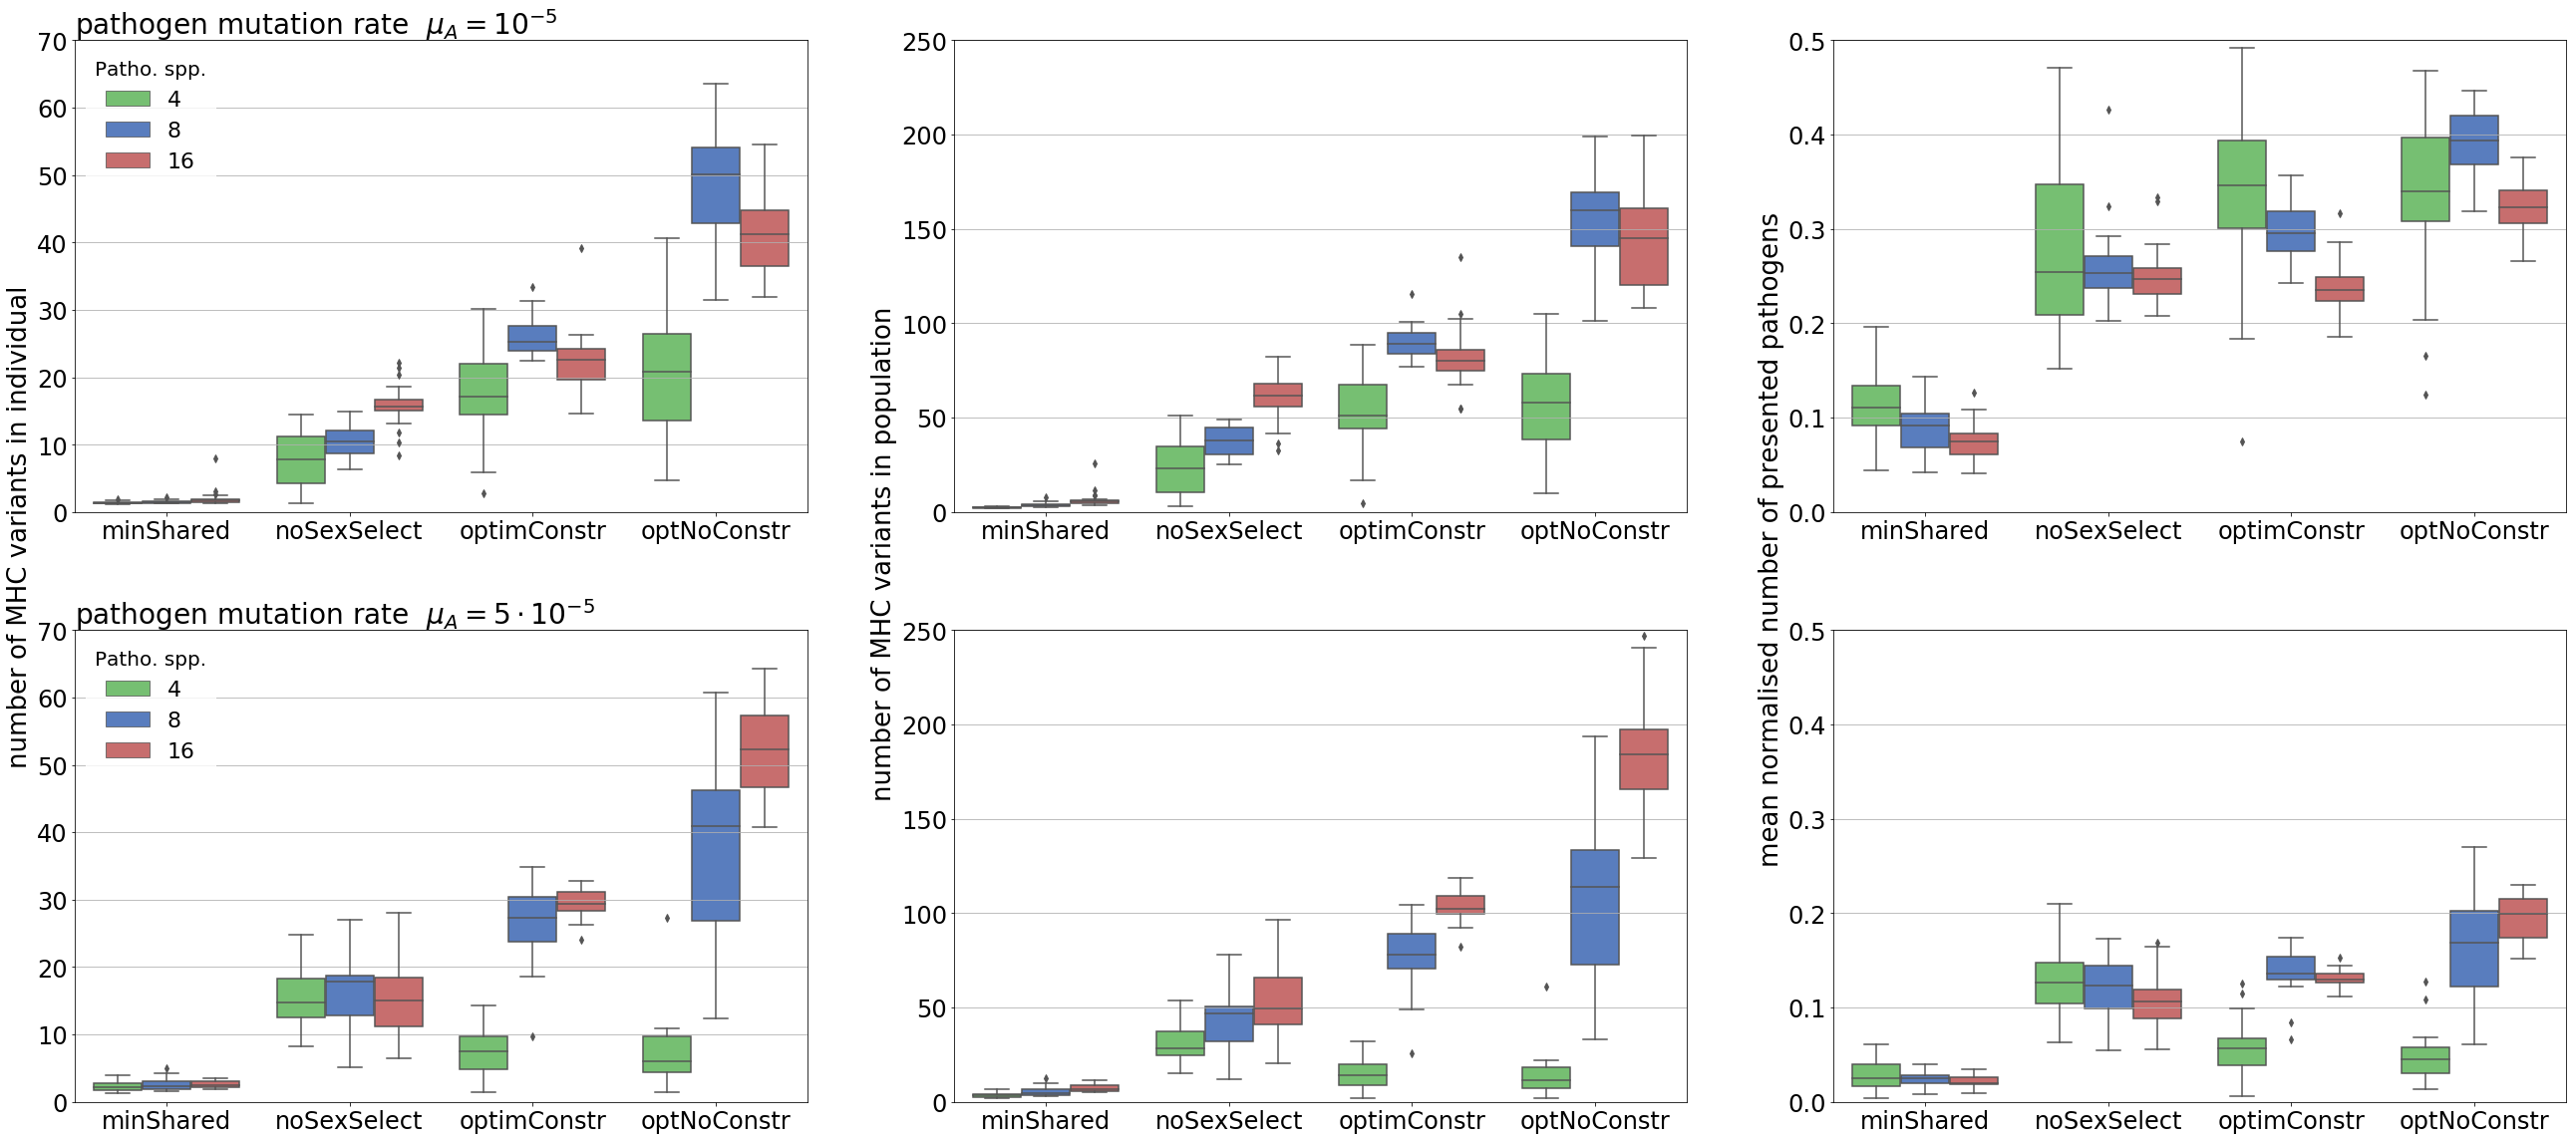

In [61]:
plt.figure(figsize=(36,16))

patho_mut = 0.00001
plt.subplot(231)
what = "indvMean"
plotBox(what, df_1, patho_mut, 70, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("number of MHC variants in individual", fontsize=ax_label)
plt.subplot(232)
what = "meanAllel"
plotBox(what, df_1, patho_mut, 250, False)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label)
plt.subplot(233)
what = "meanPatho"
plotBox(what, df_1, patho_mut, 0.5, False)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(234)
what = "indvMean"
plotBox(what, df_5, patho_mut, 70, True)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')
plt.subplot(235)
what = "meanAllel"
plotBox(what, df_5, patho_mut, 250, False)
plt.ylabel("        number of MHC variants in population", fontsize=ax_label, horizontalalignment='left')
plt.subplot(236)
what = "meanPatho"
plotBox(what, df_5, patho_mut, 0.5, False)
plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label, horizontalalignment='left')
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("sexSelectCompr.png")
plt.show()

In [62]:
def justPlotDeviantFromMeanFather(ww, deltas, bSize, clr, xl=(0, 90), yl=(-25, 10)):
    """Does the same as `plotDeviantFromMeanFather()` only it does not
    calculate the stats on it self."""
    FS = 26
    bSize = np.sqrt(bSize)  # Create marker list
    plt.scatter(ww, deltas, s=bSize, color=clr)
    ll = np.linspace(xl[0], xl[1], 30)
    plt.plot(ll, np.zeros(len(ll)), 'k-', lw=3)
    plt.grid(axis='y')
    #plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
    #plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from" +
    #           " pre-mating population", fontsize=FS)
    plt.xlim(xl)
    plt.ylim(yl)
    plt.xticks(size=FS-2)
    plt.yticks(size=FS-2)
    plt.tight_layout()

#### The line below decides what number of pathogen species is interesting. Choice is: **4, 8, 16**

In [72]:
spp = str(16)

In [73]:
minShr = ssmn.avgDatOut(np.load("./minShared_1e5/sexSelectStrgt_" + spp + "_minShr_1e5.npy"))
optimAlpha = ssmn.avgDatOut(np.load("./optimAlpha_1e5/sexSelectStrgt_" + spp + "_optAlpha_1e5.npy"))
optNoAlpha = ssmn.avgDatOut(np.load("./optimNoAlpha_1e1/sexSelectStrgt_" + spp + "_optNoAlpha_1e5.npy"))
minShr5e5 = ssmn.avgDatOut(np.load("./minShared_5e5/sexSelectStrgt_" + spp + "_minShr_5e5.npy"))
optimAlpha5e5 = ssmn.avgDatOut(np.load("./optimAlpha_5e5/sexSelectStrgt_" + spp + "_optAlpha_5e5.npy"))
optNoAlpha5e5 = ssmn.avgDatOut(np.load("./optimNoAlpha_5e5/sexSelectStrgt_" + spp + "_optNoAlpha_5e5.npy"))

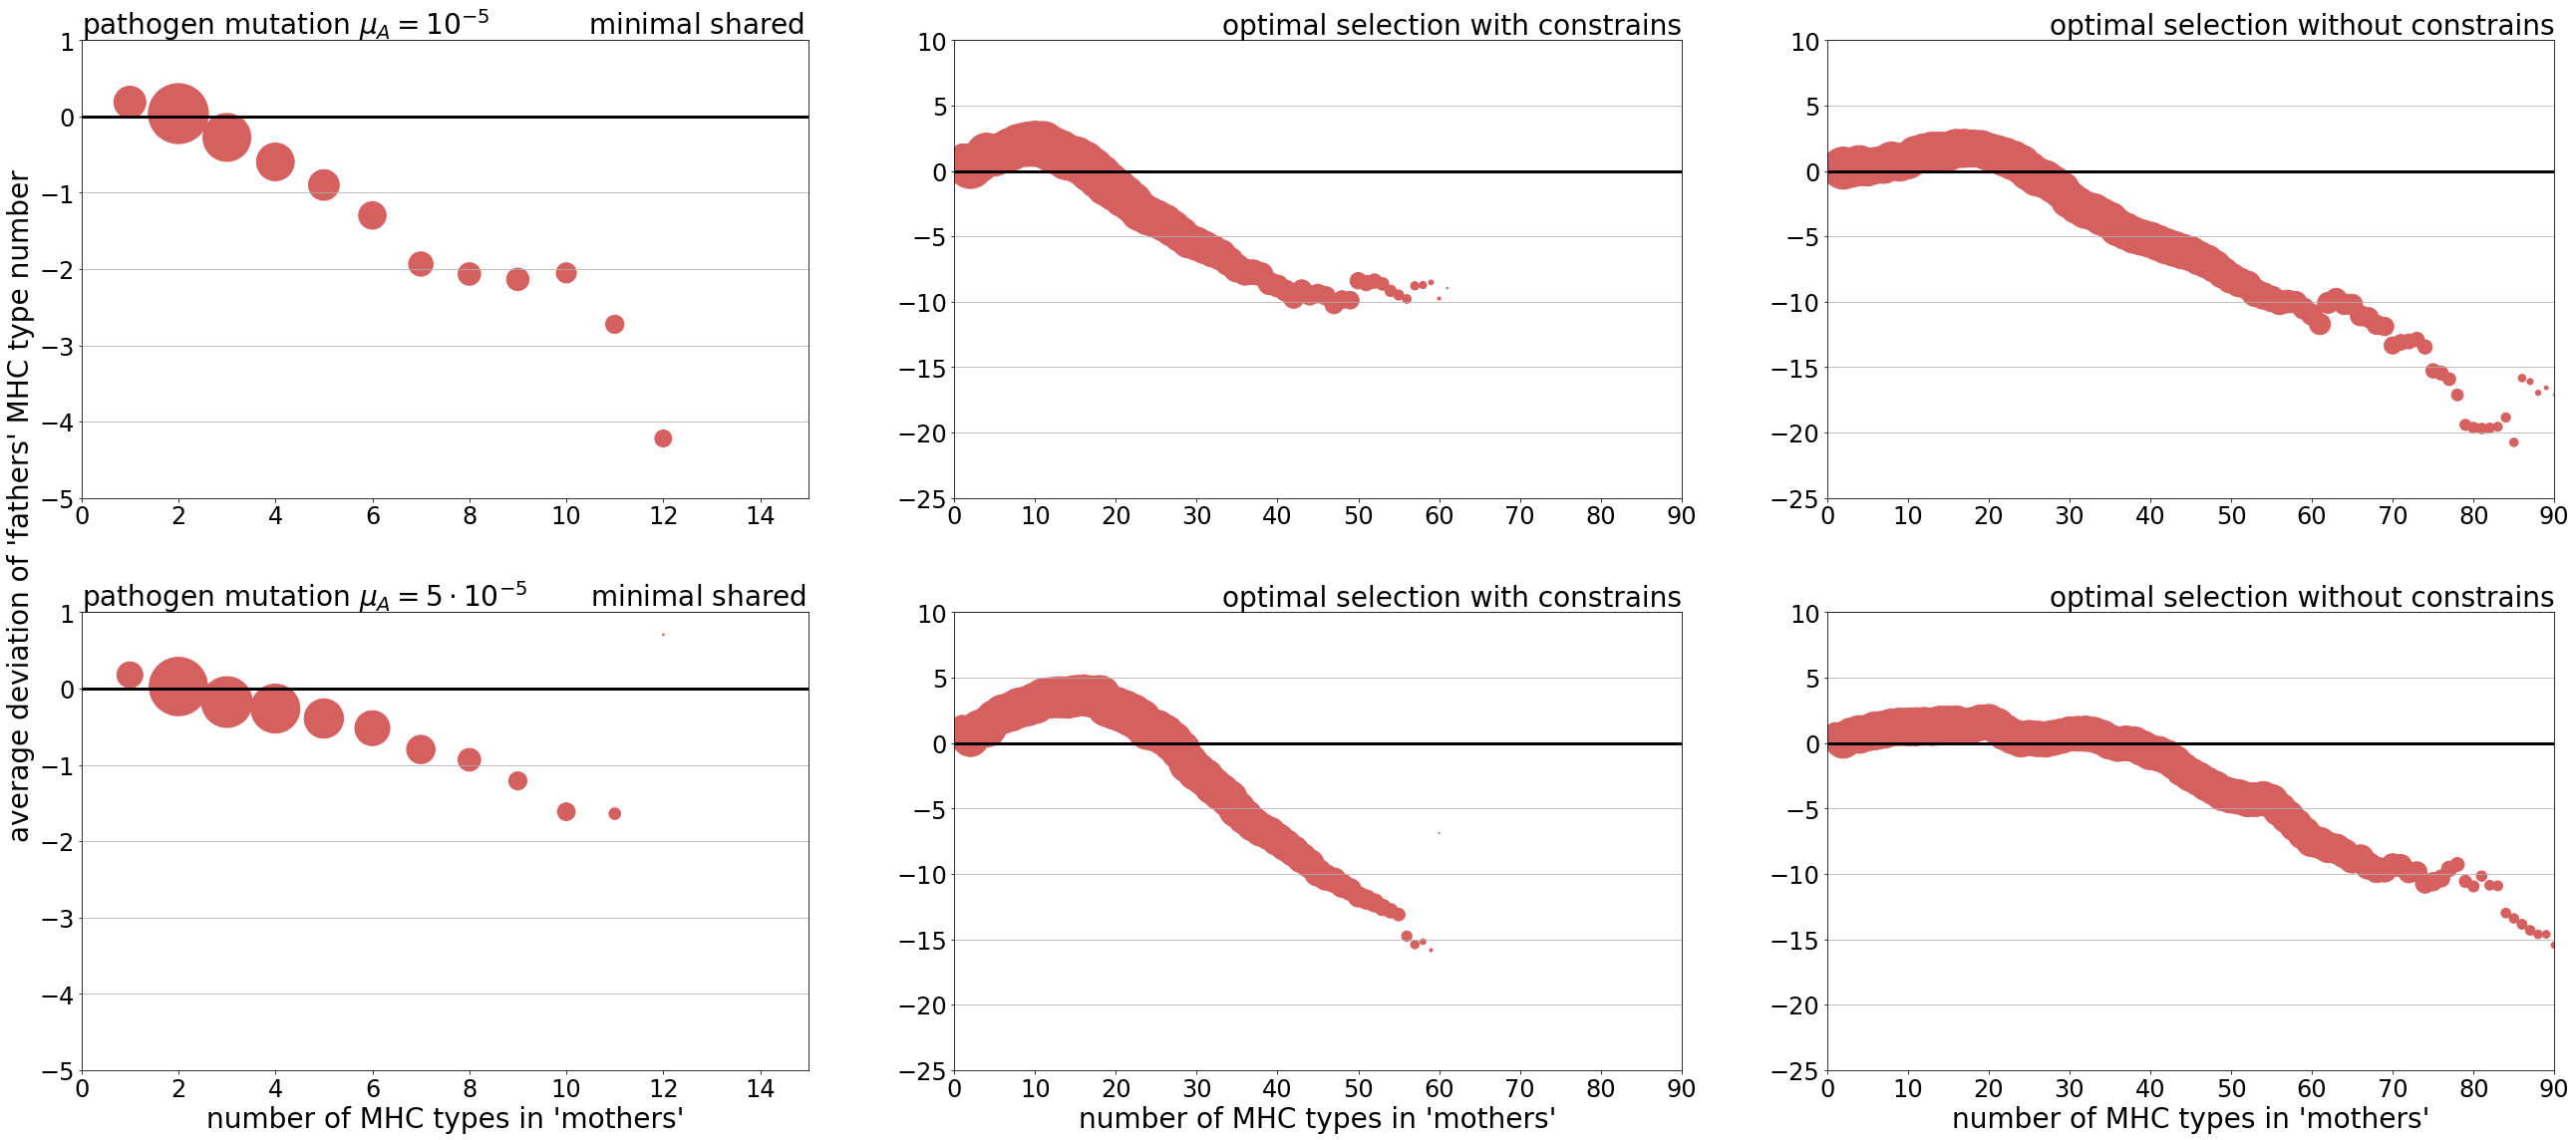

In [74]:
FS = 28
colr = palDct[spp]
plt.figure(figsize=(36,16))
plt.title("Number of pathogen spesies ")
plt.subplot(231)
justPlotDeviantFromMeanFather(minShr[:, 0], minShr[:, 1], minShr[:, 2], colr, (0,15), (-5,1))
plt.title("pathogen mutation $\mu_{A} = 10^{-5}$           minimal shared", loc='left', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
plt.subplot(232)
justPlotDeviantFromMeanFather(optimAlpha[:, 0], optimAlpha[:, 1], optimAlpha[:, 2], colr)
plt.title("optimal selection with constrains", loc='right', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
plt.subplot(233)
justPlotDeviantFromMeanFather(optNoAlpha[:, 0], optNoAlpha[:, 1], optNoAlpha[:, 2], colr)
plt.title("optimal selection without constrains", loc='right', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)

plt.subplot(234)
justPlotDeviantFromMeanFather(minShr5e5[:, 0], minShr5e5[:, 1], minShr5e5[:, 2], colr, (0,15), (-5,1))
plt.title("pathogen mutation $\mu_{A} = 5 \cdot 10^{-5}$       minimal shared", loc='left', 
          fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
plt.ylabel("average deviation of 'fathers' MHC type number", fontsize=FS, horizontalalignment='left')
plt.subplot(235)
justPlotDeviantFromMeanFather(optimAlpha5e5[:, 0], optimAlpha5e5[:, 1], optimAlpha5e5[:, 2], colr)
plt.title("optimal selection with constrains", loc='right', fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
plt.subplot(236)
justPlotDeviantFromMeanFather(optNoAlpha5e5[:, 0], optNoAlpha5e5[:, 1], optNoAlpha5e5[:, 2], colr)
plt.title("optimal selection without constrains", loc='right', fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
strr = "SexSelectStrght_" + spp + "_pat_spp.png"
plt.savefig(strr)
plt.show()